# Lagged AR(1) Time Series Example
This notebook demonstrates cross-correlation and bootstrapped significance for two AR(1) time series where one is a lagged version of the other.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from SpectralCorr import *

### 1. Generate AR(1) time series with a known lag relationship

In [6]:
N = 312
dt = 1.0
lag_true = 36  # true lag in time steps
rho = 0.9
noise_std = 1.0

# Generate base AR(1) process
ts_base = AR1_process(rho, noise_std, 1, N + lag_true, seed=123, dt=dt)

ts1 = ts_base.shift(time = -lag_true).dropna("time")
ts2 = ts_base.isel(time = slice(None, -lag_true))

ccf_maxlag = 100
ccf_ds = cross_correlation(ts1, ts2, maxlags=ccf_maxlag)
lag_max, ccf_max = cross_correlation_maxima(ts1, ts2, maxlags=ccf_maxlag)

/var/folders/xc/1pgd3mgn7qjdv8bmcggt31j40000gn/T/ipykernel_82021/3298263068.py:15: DeprecationWarning: cross_correlation_maxima() is deprecated and will be removed in a future version. Use maximum_cross_correlation() instead.
  lag_max, ccf_max = cross_correlation_maxima(ts1, ts2, maxlags=ccf_maxlag)


### 2. Visualize the lagged AR(1) time series

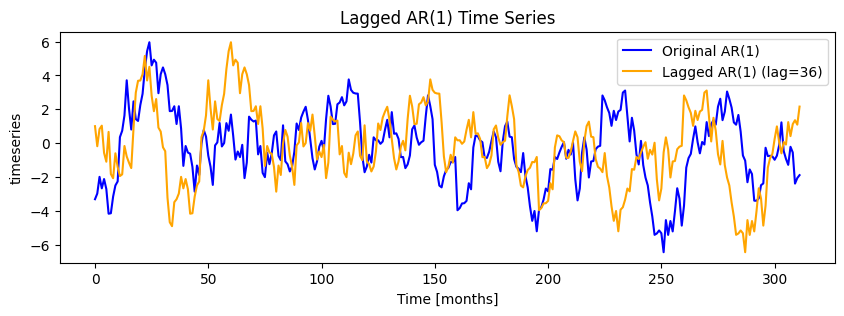

In [7]:
fig, axes = plt.subplots(figsize=(10, 3))
ts1.plot(ax=axes, label='Original AR(1)', color='blue')
ts2.plot(ax=axes, label=f'Lagged AR(1) (lag={lag_true})', color='orange')
axes.set_title('Lagged AR(1) Time Series')
axes.set_xlabel('Time [months]')
axes.legend()

### 3. Visualize and check correlation significance using Pearson and Ebisuzaki methods

Computing cross-correlation: 100%|██████████| 201/201 [00:13<00:00, 14.53it/s]


AttributeError: 'NoneType' object has no attribute 'tight_layout'

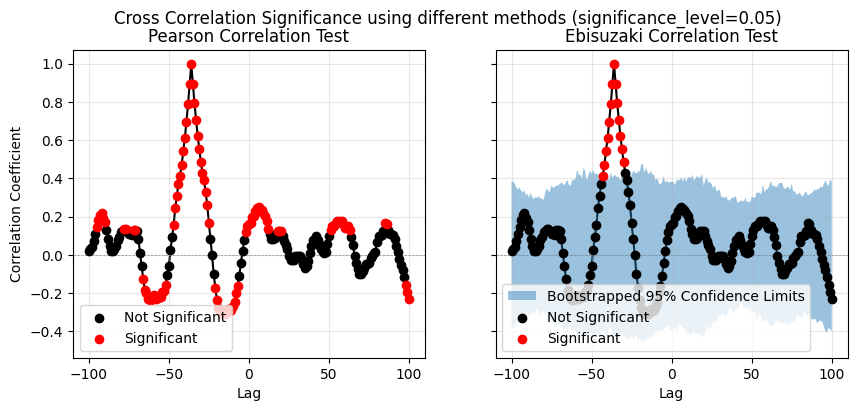

In [8]:
significance_level = 0.05  # significance level 

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

fig.suptitle(f'Cross Correlation Significance using different methods (significance_level={significance_level})')

#### GAUSSIAN CCF SIGNIFICANCE #####
axes[0].set_title("Pearson Correlation Test")
ccf_ds = cross_correlation(ts1, ts2, maxlags=ccf_maxlag, method='pearson')
fig, ax = plot_cross_correlation(ccf_ds, significance_level=significance_level, 
                               show_significance=True, show_confidence=False, ax=axes[0])

#### BOOTSTRAPPED (MONTE CARLO) CCF SIGNIFICANCE #####
axes[1].set_title("Ebisuzaki Correlation Test")
n_iter = 1000  # number of Monte Carlo Iterations 
bccf_ds = cross_correlation(ts1, ts2, maxlags=ccf_maxlag, method='ebisuzaki',
                            n_iter=n_iter, return_distributions=True, detrend=True)
fig, ax = plot_cross_correlation(bccf_ds, significance_level=significance_level, 
                               show_significance=True, show_confidence=True, ax=axes[1])

axes[1].set_ylabel("")

for a in axes:
    a.legend(loc="lower left")
    
fig.tight_layout()

#### The cross-correlation peak should be at the true lag value, and the bootstrap confirms its significance.